<a href="https://colab.research.google.com/github/smendes801/ECGR4105/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sofia Mendes
*Student ID:  801259019*

*Assignment: Homework #*1

# Problem 1

Develop a code that runs linear regression with a gradient decent algorithm for each explanatory variable in isolation. In this case,you assume that in each iteration,only one explanatory variable (either x1,x2,or x3) is explaining the output. You need to do three different training,one per each explanatory variable. For the learning rate,explore different values between 0.1 and 0.01 (your choice). Initialize your parameters to zero (theta to zero).

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

site="https://raw.githubusercontent.com/smendes801/ECGR4105/refs/heads/datasets/D3.csv"
df=pd.read_csv(site)

In [ ]:
x1=df.values[:,0]
x2=df.values[:,1]
x3=df.values[:,2]
Y=df.values[:,3]

m=len(Y)  # Number of training examples

x0=np.ones((m,1))
X1=np.hstack((x0,x1.reshape(m,1)))
X2=np.hstack((x0,x2.reshape(m,1)))
X3=np.hstack((x0,x3.reshape(m,1)))

iterations=1500
alpha=[0.01,0.05,0.10] # Different learning rates to explore

In [ ]:
def costFunc(X,y,theta):
    m=len(y)
    predictions=X.dot(theta)
    errors=np.subtract(predictions,y)
    sqrErrors=np.square(errors)
    J=1 / (2 * m) * np.sum(sqrErrors)
    return J

# Gradient Descent Function
def gradient_descent(X,y,alpha,iterations):
    m=len(y)
    theta=np.zeros(X.shape[1])
    cost_history=np.zeros(iterations)

    for i in range(iterations):
        predictions=X.dot(theta)
        errors=np.subtract(predictions,y)
        sum_delta=(alpha / m) * X.transpose().dot(errors)
        theta -= sum_delta
        cost_history[i]=costFunc(X,y,theta)

    return theta,cost_history

In [ ]:
def computeGradientDescentAlphas(X, y, alphas, iterations, name="Model"):
    thetas = []
    cost_histories = []
    results = []  # List to store results for table creation

    # Perform gradient descent for each learning rate
    for a in alphas:
        final_theta, cost_history = gradient_descent(X, y, a, iterations)
        thetas.append(final_theta)
        cost_histories.append(cost_history)
        results.append(
            {
                "Model": name,
                "Alpha": a,
                "Thetas": final_theta,
                "Final Cost": cost_history[-1],
            }
        )

    # Create and display the table
    df_results = pd.DataFrame(results)
    print(f"Results for {name}:\n")
    display(df_results)
    print("\n")

    return thetas, cost_histories

In [ ]:
def funcPlot(X,Y,alpha,thetas,cost_histories,iterations,name=""):
    plt.figure(figsize=(9,4))

    # Plot training data and regression lines
    plt.subplot(1,2,1)
    plt.scatter(X[:,1],Y,color='red',marker='+',label='Training Data')

    # Plot regression lines for different alphas
    for i in range(len(alpha)):
        plt.plot(X[:,1],X.dot(thetas[i]),label=f'Regression for {alpha[i]}')

    plt.grid(True)
    plt.legend()
    plt.title(f'Linear Model for {name}')
    plt.xlabel('Input Feature (X)')
    plt.ylabel('Target Variable (Y)')

    # Plot cost histories for different alphas
    plt.subplot(1,2,2)
    for i in range(len(alpha)):
        plt.plot(range(1,len(cost_histories[i]) + 1),cost_histories[i],label=f'Alpha={alpha[i]}')

    plt.grid(True)
    plt.legend()
    plt.title(f'Gradient Descent Cost History for {name}')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')

    plt.tight_layout()
    plt.show()

In [ ]:
# @title Variable Model Results
thetas1,cost_histories1=computeGradientDescentAlphas(X1,Y,alpha,iterations,"X1")
thetas2,cost_histories2=computeGradientDescentAlphas(X2,Y,alpha,iterations,"X2")
thetas3,cost_histories3=computeGradientDescentAlphas(X3,Y,alpha,iterations,"X3")

Results for X1:



,Model,Alpha,Thetas,Final Cost
0,X1,0.01,"[5.718506528385593, -1.9568205977732744]",0.990589
1,X1,0.05,"[5.927948595755642, -2.0383365082076943]",0.984993
2,X1,0.10,"[5.927948918061593, -2.038336633650798]",0.984993




Results for X2:



,Model,Alpha,Thetas,Final Cost
0,X2,0.01,"[0.7198847334502397, 0.5639033419472831]",3.599399
1,X2,0.05,"[0.7360604051895187, 0.557607620025968]",3.599366
2,X2,0.10,"[0.7360604300947937, 0.557607610332603]",3.599366




Results for X3:



,Model,Alpha,Thetas,Final Cost
0,X3,0.01,"[2.7804812909944903, -0.4845163094735121]",3.630526
1,X3,0.05,"[2.8714219890778536, -0.520482838853714]",3.629451
2,X3,0.10,"[2.871422103988201, -0.5204828843001038]",3.629451


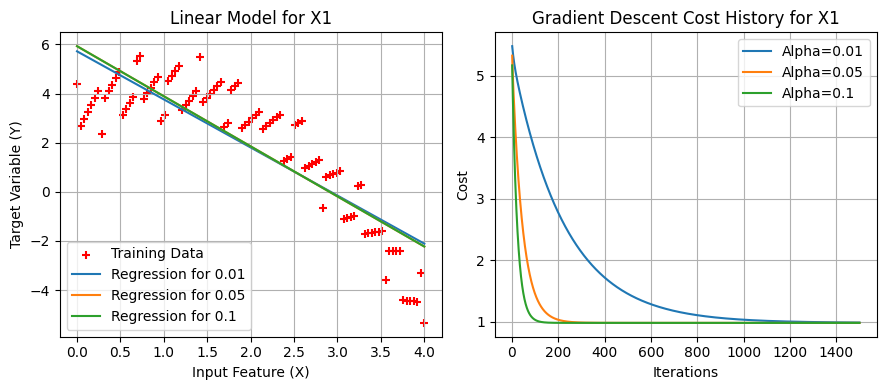

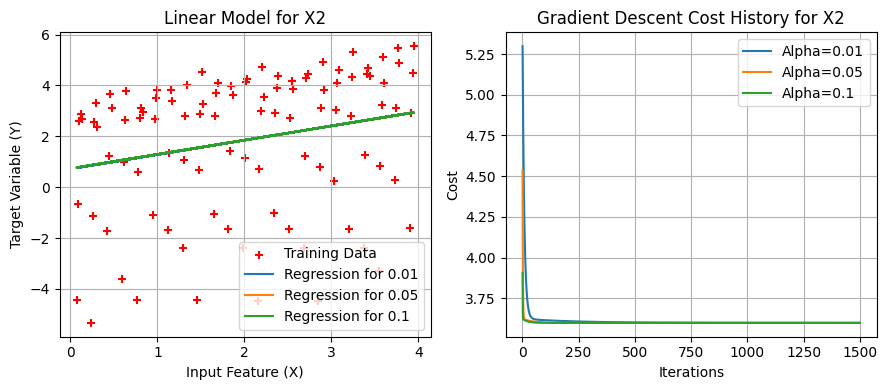

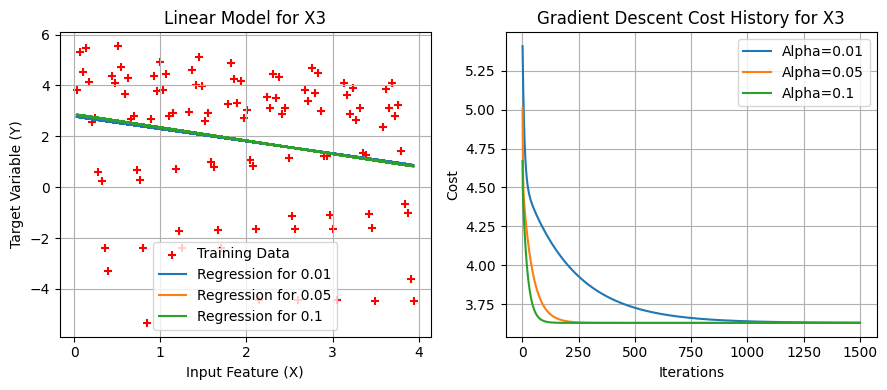

In [ ]:
# @title Plot for Each Variable
funcPlot(X1,Y,alpha,thetas1,cost_histories1,iterations,"X1")
funcPlot(X2,Y,alpha,thetas2,cost_histories2,iterations,"X2")
funcPlot(X3,Y,alpha,thetas3,cost_histories3,iterations,"X3")

## P1 Answers

1. Report the linear model you found for each explanatory variable.


2. Plot the final regression model and loss over the iteration per each explanatory variable.


3. Which explanatory variable has the lower loss (cost) for explaining the output (Y)?


4. Based on your training observations, describe the impact of the different learning rates on the final loss and number of training iterations.




# Problem 2

This time,run linear regression with gradient descent algorithm using all three explanatory variables. For the learning rate,explore different values between 0.1 and 0.01 (your choice). Initialize your parameters (theta to zero).

In [ ]:
# @title Combined Results
def predict_value(x_in,theta_in):
    y=theta_in[0]
    for x_val,theta_val in zip(x_in,theta_in[1:]):
      y += x_val * theta_val
    return y

reshaped_x1=x1.reshape(m,1)
reshaped_x2=x2.reshape(m,1)
reshaped_x3=x3.reshape(m,1)

total_data=np.hstack((x0,reshaped_x1,reshaped_x2,reshaped_x3))

# Compute thetas and cost histories
combinedTheta,combinedCostHistory=computeGradientDescentAlphas(total_data,Y,alpha,iterations,"Combined")

Results for Combined:



,Model,Alpha,Thetas,Final Cost
0,Combined,0.01,"[4.151187282528127, -1.839429097710375, 0.7247...",0.810510
1,Combined,0.05,"[5.311281361517259, -2.0033116002156244, 0.533...",0.738465
2,Combined,0.10,"[5.314165627499571, -2.0037190505172755, 0.532...",0.738464


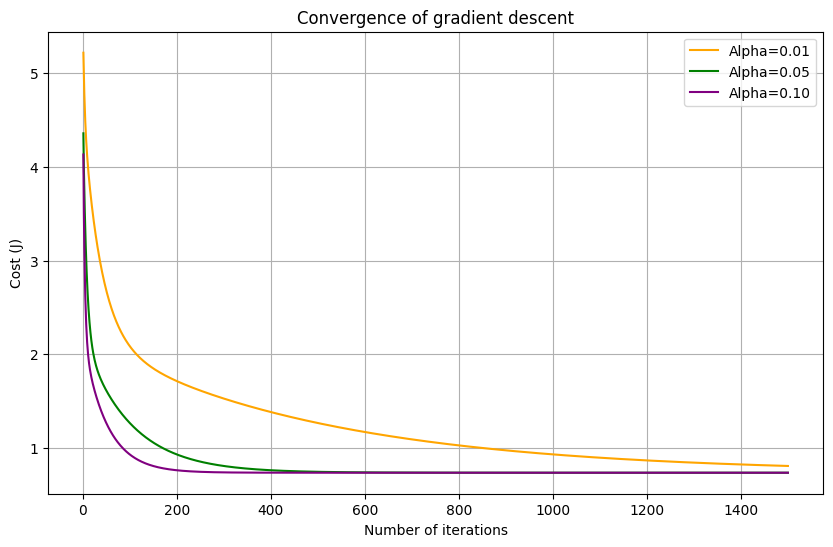

In [ ]:
# @title Convergence of gradient descent
plt.plot(range(1,iterations + 1),combinedCostHistory[0],color='orange',label='Alpha=0.01')
plt.plot(range(1,iterations + 1),combinedCostHistory[1],color='green',label='Alpha=0.05')
plt.plot(range(1,iterations + 1),combinedCostHistory[2],color='purple',label='Alpha=0.10')
plt.rcParams["figure.figsize"]=(10,6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.legend()
plt.title('Convergence of gradient descent')
plt.show()

In [ ]:
# @title Y Value Predictions
def predict_value(x_in,theta_in):
    y=theta_in[0]
    for x_val,theta_val in zip(x_in,theta_in[1:]):
        y += x_val * theta_val
    return y

# Predict the values using best_theta
values = [[1, 1, 1], [2, 0, 4], [3, 2, 1]]
predictions = []

for i,value_set in enumerate(values):
    y = predict_value(value_set, combinedTheta[2])
    predictions.append(y)
    print(f"Prediction {i+1}: {y}")

# Print thetas for the alpha=0.10 model
print(f"\nThetas for alpha = 0.10: {combinedTheta[2]}")

Prediction 1: 3.577408529345462
Prediction 2: 0.2443209702176523
Prediction 3: 0.1025340197359193

Thetas for alpha = 0.10: [ 5.31416563 -2.00371905  0.53256359 -0.26560164]
